# Parte 2: Exercício Computacional
Exercícios implementados em Python 3 utilizando Jupyter Notebook.

In [417]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x = np.arange(0, 10, 0.1)
y = fuzz.trimf(x, [2, 4, 7])
a = fuzz.trimf(x, [3, 4, 7])
b = fuzz.trimf(x, [4, 5, 9])

## Questão 1. Complemento nebuloso

In [418]:

def plot_complemento(complmento, label_complemento):
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, label="y")
    plt.plot(x, complmento, label=label_complemento)
    plt.xlabel("X")
    plt.ylabel("Pertinência")
    plt.legend()
    plt.show()

### Zadeh


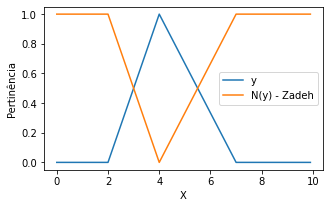

In [419]:
def zadeh(y):
    z = [0] * len(y)
    for i in range(len(y)):
        z[i] = 1 - y[i]
    return z

z = zadeh(y)
plot_complemento(z, "N(y) - Zadeh")

### Yager

In [420]:
def yager(y, w):
    g = [0] * len(y)
    for i in range(len(y)):
        g[i] = (1 - y[i]**w)**(1/w)
    return g

#### Para w = 1

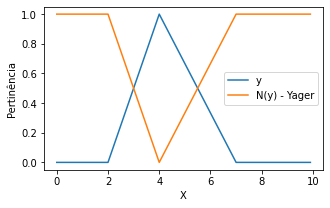

In [421]:
g = yager(y, 1)
plot_complemento(g, "N(y) - Yager")

#### Para w = 10

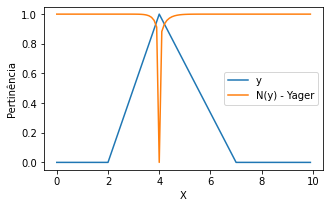

In [422]:
g = yager(y, 10)
plot_complemento(g, "N(y) - Yager")

### Sugeno

In [423]:
def sugeno(y, s):
    u = [0] *  len(y)
    for i in range(len(y)):
        u[i] = (1 - y[i]) / (1 + s*y[i])
    return u

#### Para s = 0

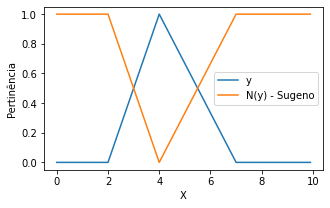

In [424]:
u = sugeno(y, 0)
plot_complemento(u, "N(y) - Sugeno")

#### Para s = 10

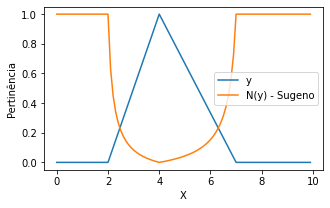

In [425]:
u = sugeno(y, 10)
plot_complemento(u, "N(y) - Sugeno")

## Questão 2. União nebulosa

In [426]:
def plot_uniao(uniao):
    plt.figure(figsize=(5, 3))
    plt.plot(x, a, label="A")
    plt.plot(x, b, label="B")
    plt.plot(x, uniao, label="A U B")

    plt.xlabel("X")
    plt.ylabel("Pertinência")
    plt.legend()
    plt.show()

### Máximo

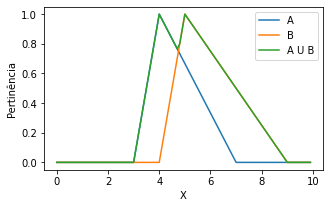

In [427]:
def uniao_maximo(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        z[i] = max(a[i], b[i])
    return z

z = uniao_maximo(a, b)
plot_uniao(z)

### Soma algébrica (probabilística)

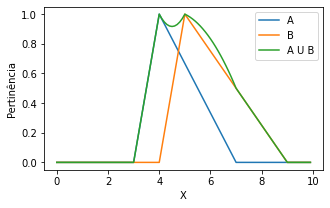

In [428]:
def uniao_soma_algebrica(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        z[i] = a[i] + b[i] - a[i] * b[i]
    return z

z = uniao_soma_algebrica(a, b)
plot_uniao(z)

### Soma limitada

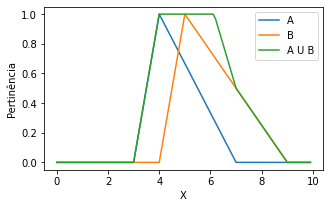

In [429]:
def uniao_soma_limitada(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        z[i] = min(1, a[i] + b[i])
    return z

z = uniao_soma_limitada(a, b)
plot_uniao(z)

### Soma drástica

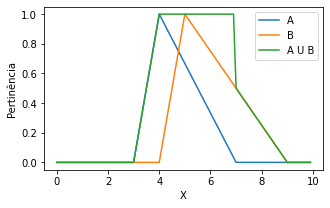

In [430]:
def unicao_soma_drastica(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        if b[i] == 0:
            z[i] = a[i]
        elif a[i] == 0:
            z[i] = b[i]
        else:
            z[i] = 1
    return z

z = unicao_soma_drastica(a, b)
plot_uniao(z)


## Questão 3. Interseção nebulosa


In [431]:
def plot_intersecao(intersecao):
    plt.figure(figsize=(5, 3))
    plt.plot(x, a, label="A")
    plt.plot(x, b, label="B")
    plt.plot(x, intersecao, label="A ∩ B")
    plt.xlabel("X")
    plt.ylabel("Pertinência")
    plt.legend()
    plt.show()
    

### Mínimo

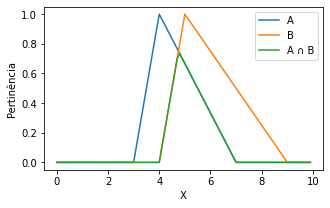

In [432]:
def intersecao_minimo(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        z[i] = min(a[i], b[i])
    return z

z = intersecao_minimo(a, b)
plot_intersecao(z)

### Produto algébrico

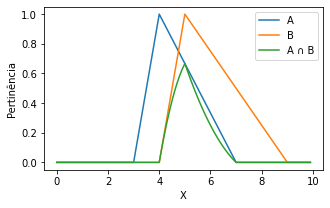

In [433]:
def intersecao_produto_algebrico(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        z[i] = a[i] * b[i]
    return z

z = intersecao_produto_algebrico(a, b)
plot_intersecao(z)

### Produto limitado

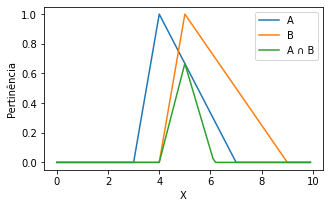

In [434]:
def intersecao_produto_limitado(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        z[i] = max(0, a[i] + b[i] - 1)
    return z

z = intersecao_produto_limitado(a, b)
plot_intersecao(z)


### Produto drástico

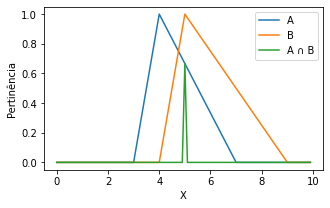

In [435]:
def intersecao_produto_drastica(a, b):
    z = [0] * len(a)
    for i in range(len(a)):
        if b[i] == 1:
            z[i] = a[i]
        elif a[i] == 1:
            z[i] = b[i]
        else:
            z[i] = 0
    return z

z = intersecao_produto_drastica(a, b)
plot_intersecao(z)